In [1]:
import os
import keras
import random
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow_probability as tfp
from tensorflow.keras.backend import clear_session
from tensorflow_probability import distributions as tfd
import functions.functions as funs

# Set the random generators for reproducibility.
os.environ['PYTHONHASHSEED']=str(12345)
random.seed(12345)
rng = np.random.default_rng(12345)
tf.random.set_seed(12345)

# Configure a new global `tensorflow` session:
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)

2023-03-01 15:08:16.357781: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Notes:
1. Standard scaler should only be used in the training set. Scaling and centrering from the beginnig leaks information to the validation and test sets. 
2. To standardise and centre the data, the mean and standard deviation of the training set must be computed. Then those metrics are used to process the validation and test sets.
3. With time series data, the standarisation should be done with a moving average, since an overall mean leaks information from the "future".

In [22]:
taxi = pd.read_csv("../Data/taxi.csv", index_col='timestamp', parse_dates=['timestamp'])

In [54]:
by_day = taxi.resample('d').mean()

In [3]:
from statsmodels.graphics.tsaplots import plot_acf

In [ ]:
by_day = taxi.resample('d').mean()

In [81]:
by_day_hour = taxi.resample('h').mean()

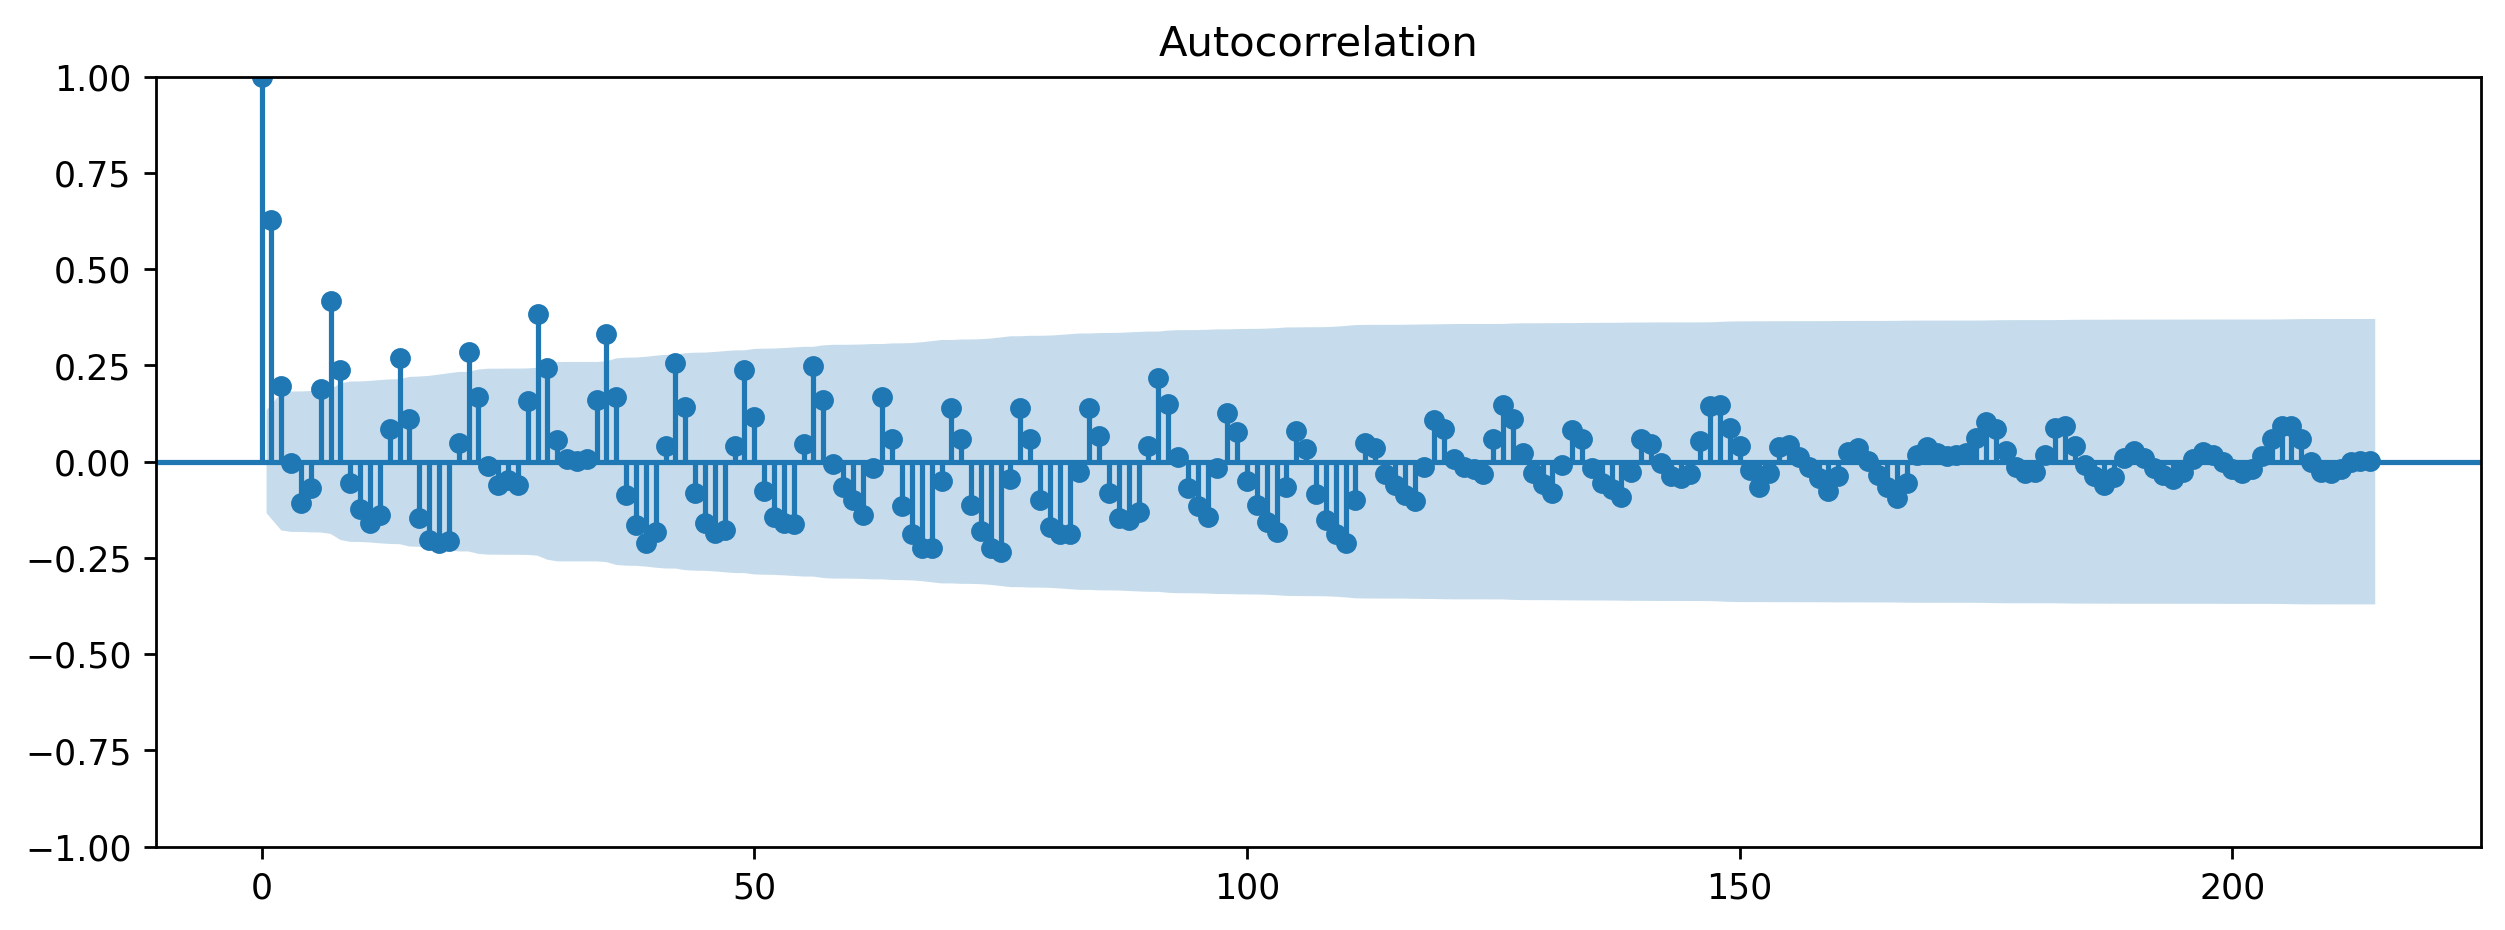

In [47]:
plot_acf(by_day, lags=214);

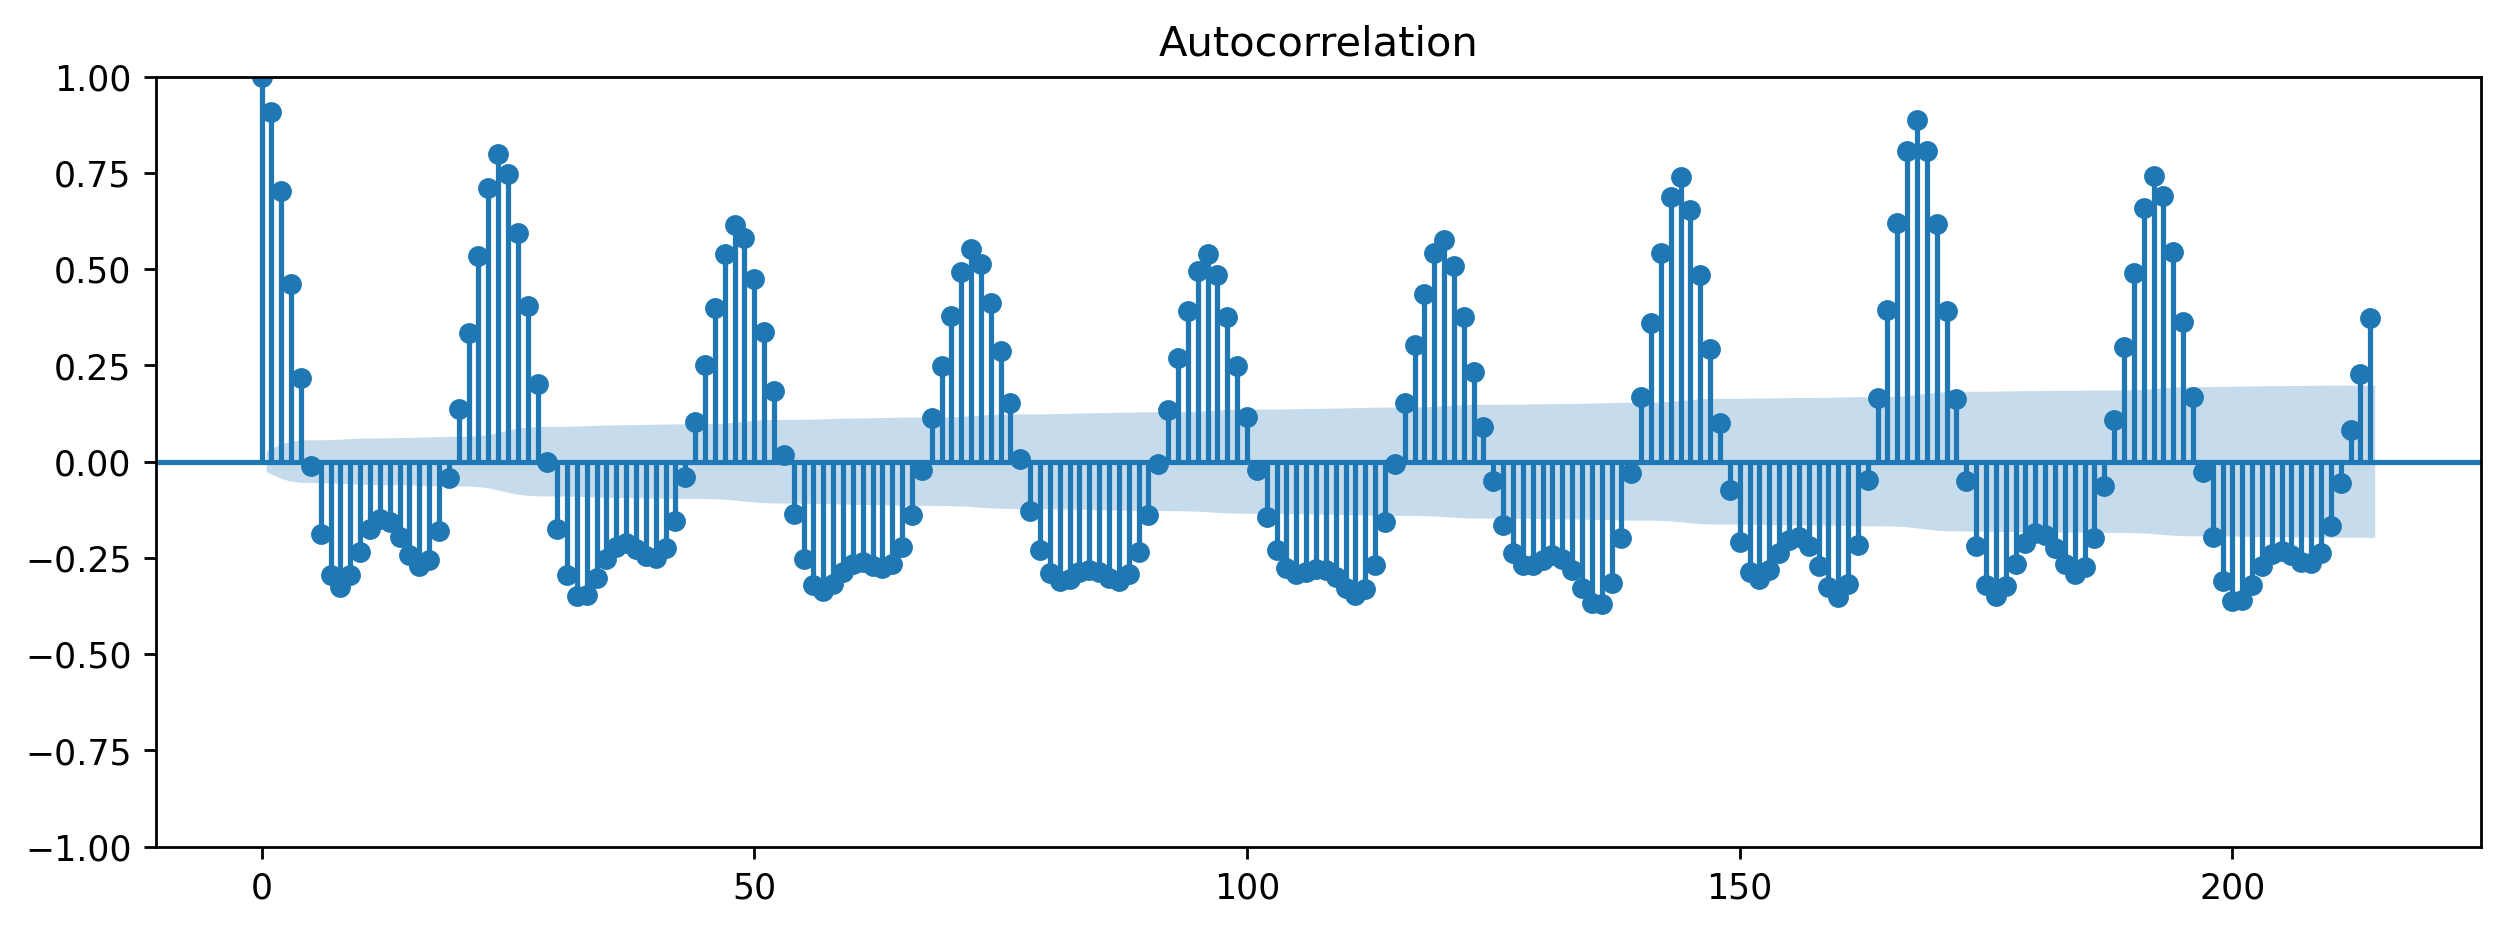

In [83]:
funs.plt_params(250,12,4)
plot_acf(by_day_hour, lags=214);

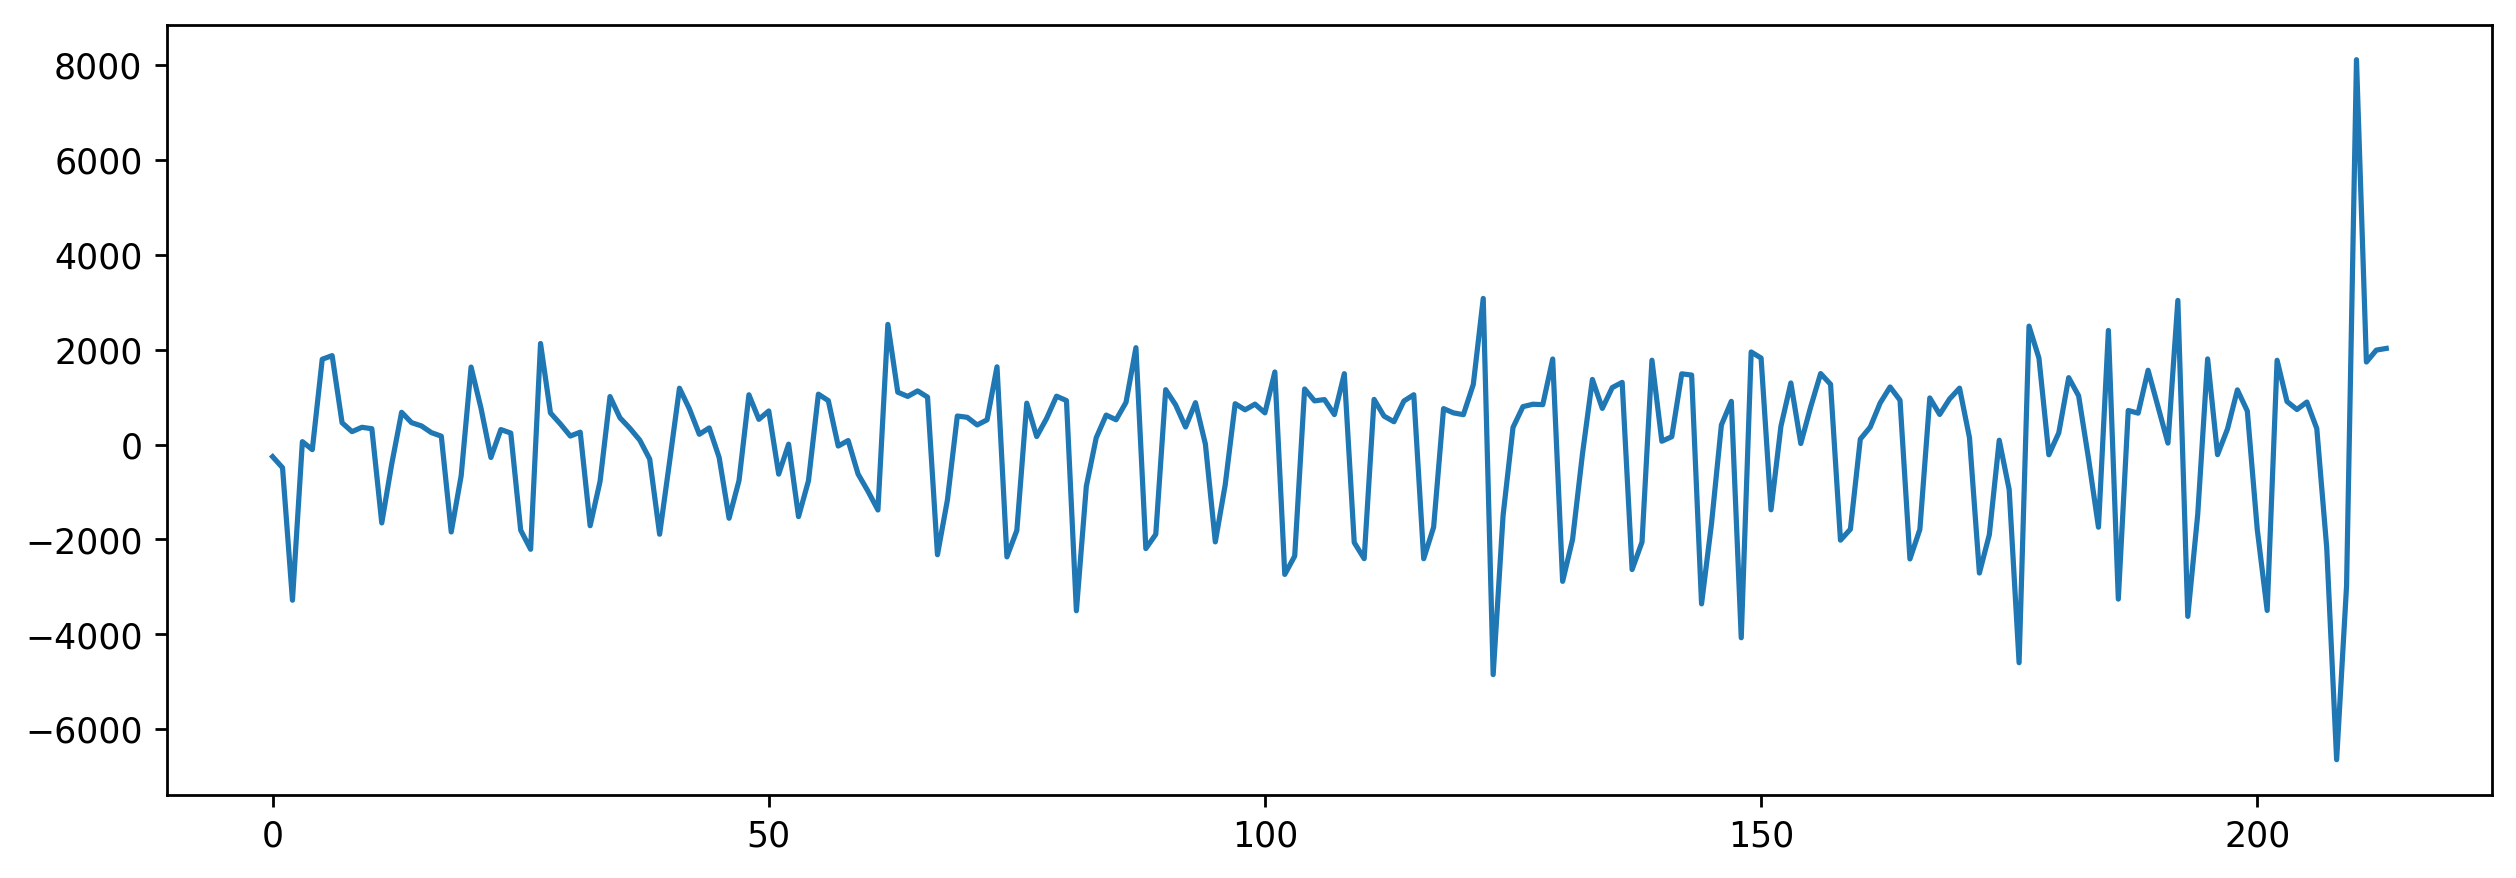

In [84]:
plt.plot(np.diff(by_day['value'], n=1))

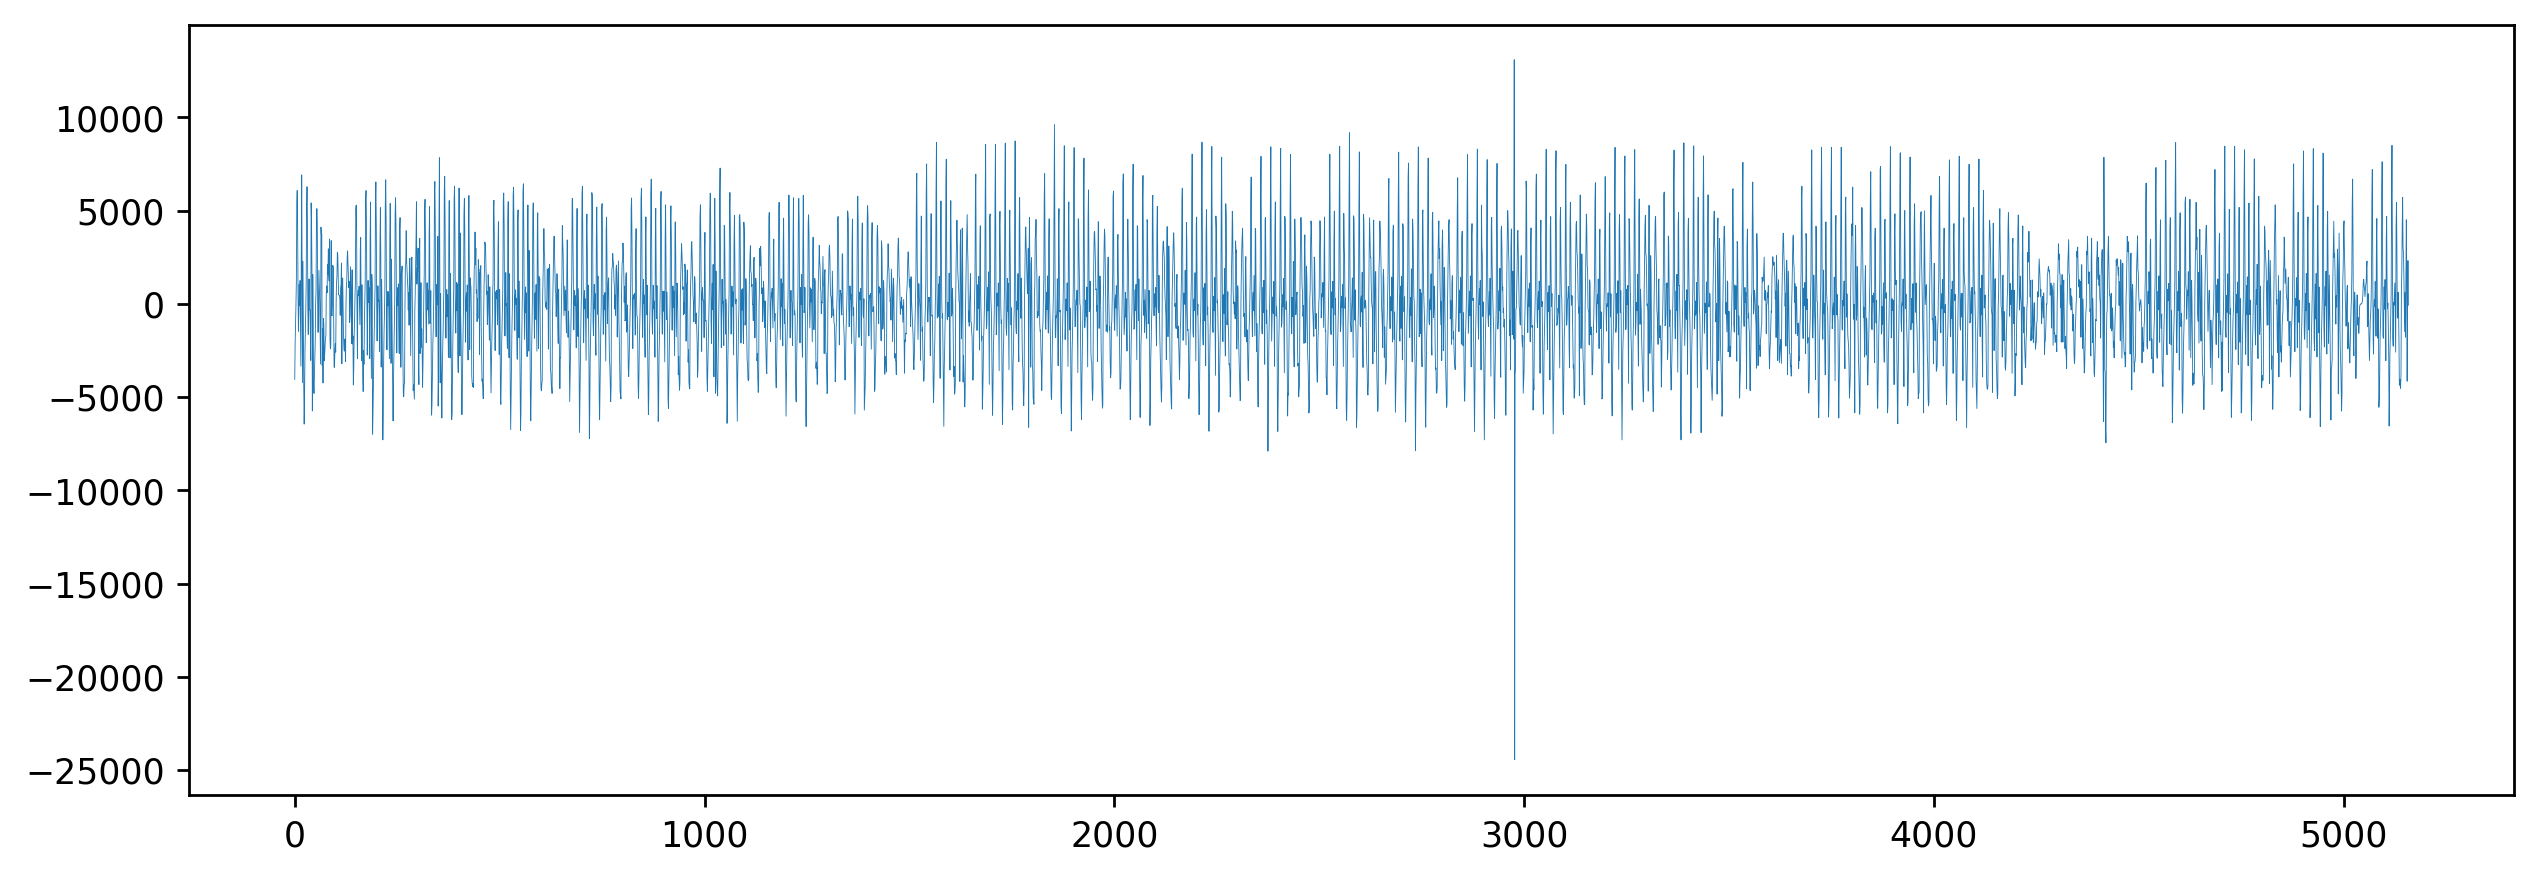

In [88]:
plt.plot(np.diff(by_day_hour['value'], n=1), lw=0.25)

In [ ]:
model = keras.models.Sequential([
    tf.keras.layers.SimpleRNN(8, activation='relu', input_shape=(), return_sequences=False),
    tf.keras.Dense(1, activation='relu')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse')
history = model.fit(X_train, y_train, epochs=500, validation_data=(X_valid, y_valid), batch=512, verbose=0)
metrics = model.evaluate(X_test, y_test, verbose=0)